<h1>SMS poruke - da li su spam ili ne </h1>

SMS Spam Collection je skup SMS označenih poruka koje su prikupljene za SMS Spam istraživanje. 
Sadrži jedan skup SMS poruka na engleskom jeziku od 5574 poruke, označene kao ham ili spam.

Kolekcija od 425 SMS spam poruka je ručno izvučena sa veb lokacije Grumbletekt. Ovo je forum u Velikoj Britaniji na kojem korisnici mobilnih telefona javno iznose tvrdnje o SMS spam porukama, većina njih bez prijavljivanja same spam poruke koju su primili. Identifikacija teksta spam poruka u tvrdnjama je veoma težak i dugotrajan zadatak, a podrazumevalo je pažljivo skeniranje stotina veb stranica.

Link do dataset-a: https://www.kaggle.com/datasets/marslinoedward/sms-spam-dataset

In [1]:
conda install pandas

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

### 1. Load dataseta

#### Look at the dataset

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
rows, cols = df.shape[0], df.shape[1]

print(f'Rows: {rows}')
print(f'Columns: {cols}')

Rows: 5572
Columns: 3


In [5]:
#drop unnecessary column
df.drop(columns = ['Unnamed: 0'] , inplace = True)
#rename dataset columns
df = df.rename(columns = {'spamORham':'target' , 'Message':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Ovde je uklonjena kolona koja ne mora da se uključi u model mašinskog učenja. Pored toga, promenjeni su nazivi kolona skupa podataka koje će se koristiti.

#### Initial basic information about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Check whether there are 'nan' values

In [7]:
# missing value 
df.isnull().sum()

target    0
text      0
dtype: int64

#### Check whether there are duplicated values in dataset

In [8]:
# check for the duplicated value 
df.duplicated().sum()

403

##### U skupu podataka postoje 403 duplirane vrednosti

#### Drop duplicated values from the dataset

In [9]:
# remove duplicate values 
df = df.drop_duplicates(keep = 'first')

In [10]:
 df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

#### Look class frequencies of 'target' variable

In [12]:
df.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4516   4516  Go until jurong point, crazy.. Available only ...    1
spam     653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

##### Imamo 4516 ham poruka i 653 spam poruka.

#### Data visualisation and exploratory data analysis... 

In [13]:
# convert target to a numerical variable
df['target_num'] = df.target.map({'ham':0, 'spam':1})
df.head()

,target,text,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


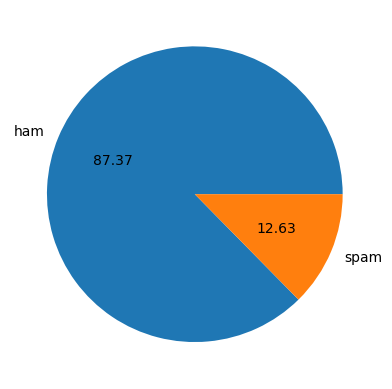

In [14]:
import matplotlib.pyplot as plt 
plt.pie(df['target_num'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


#### New features
- num_characters: broj karaktera u porukama
- num_words: broj reči u porukama
- num_sentences: broj rečenica u porukama

In [16]:
import nltk
#num of characters
df['num_characters'] = df['text'].apply(len)

# num of words 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# num of sentences  
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,target_num,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [17]:
df[df['target']=='ham'][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.575952,17.123782,1.820195
std,56.396321,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['target']=='spam'][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.738132,27.675345,2.978560
std,30.418104,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


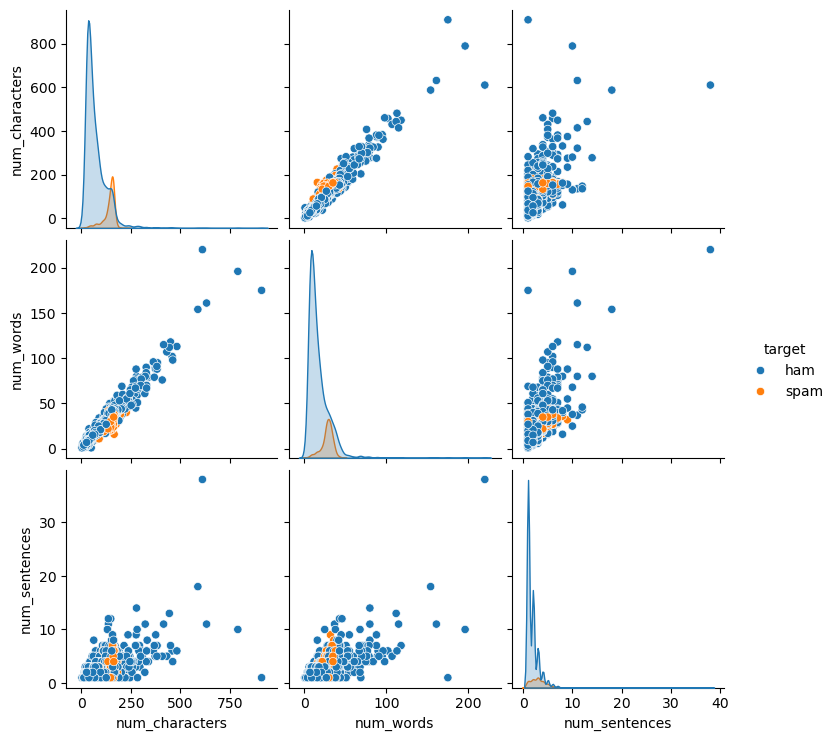

In [19]:
import seaborn as sns 
sns.pairplot(df[['num_characters', 'num_words', 'num_sentences', 'target']] , hue ='target' )

##### Add feature: length of message

In [20]:
df['text_len'] = df['text'].apply(len)
df.head()

,target,text,target_num,num_characters,num_words,num_sentences,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,111
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,155
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,61


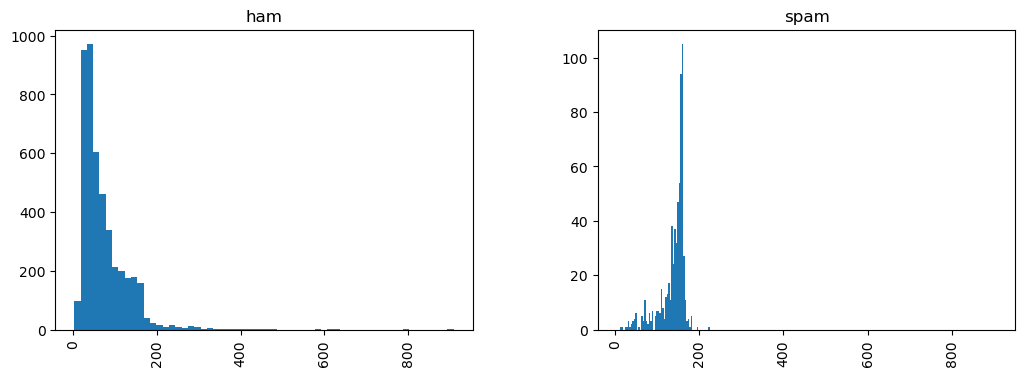

In [21]:
df.hist(column='text_len',by='target',bins=60,figsize=(12,4));
plt.xlim(-40,950);

##### Možemo da vidimo da je dužina ham poruke obično manja od dužine spam poruke.
##### Većina ham poruke ima dužinu ispod 100, za spam poruke je iznad 100.

### 2. Preprocessing

- lowe case 
- tokenization
- removing special characters 
- removing stop words and punctuation 
- stemming 

In [22]:
# stemming 
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [23]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()  # konverzija u mala slova
    text = nltk.word_tokenize(text)  # tokenizacija
    
    # filtriranje numeričkih i alfanumeričkih tokena
    y = []
    for i in text: 
        if i.isalnum(): 
            y.append(i) 
    
    # uklanjanje stop reči i interpunkcija:
    text = y[:] 
    y.clear() 
    
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i) 
     
    text = y[:] 
    y.clear() 
    
    # stemming
    for i in text: 
        y.append(ps.stem(i))

    # spajanje reči u string:
    return " ".join(y)

[nltk_data] Downloading package punkt to /Users/milica/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,target_num,num_characters,num_words,num_sentences,text_len,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,61,nah think goe usf live around though


#### Visualisation with wordcloud

In [25]:
from wordcloud import WordCloud 
wc = WordCloud(width = 400 , height = 400 , min_font_size = 10 , background_color = 'white')

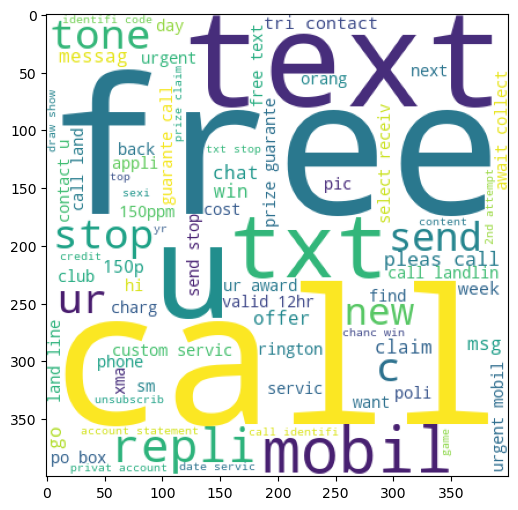

In [26]:
spam_wc = wc.generate(df[df['target_num']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

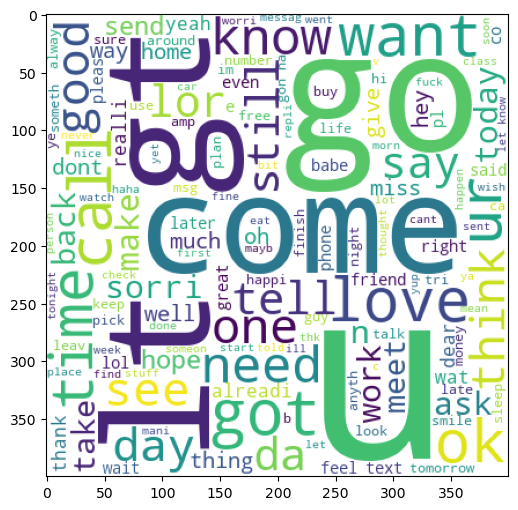

In [27]:
ham_wc = wc.generate(df[df['target_num']==0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [28]:
spam_corpus = []
for msg in df[df['target_num']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [29]:
len(spam_corpus)

9936

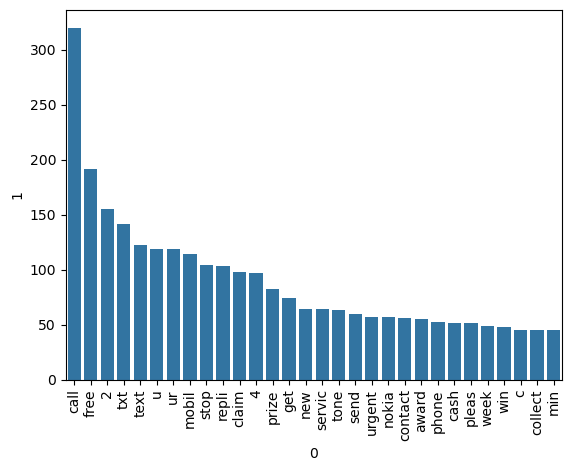

In [30]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [31]:
ham_corpus = []
for msg in df[df['target_num']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [32]:
len(ham_corpus)

35305

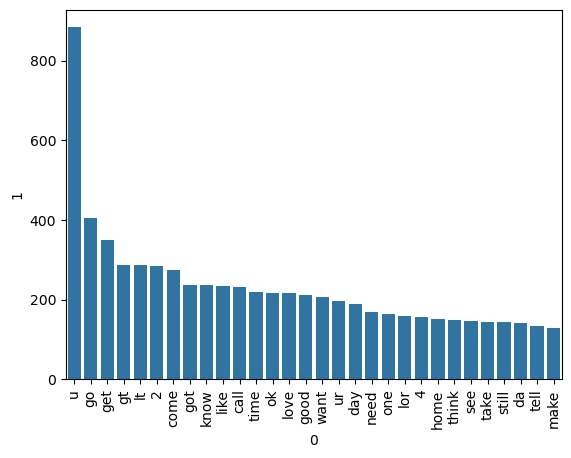

In [33]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

#### 3. Vectorization

Svaki vektor će imati onoliko dimenzija koliko ima jedinstvenih reči u SMS korpusu. Prvo ćemo koristiti SciKit Learn-ov CountVectorizer. Ovaj model će konvertovati kolekciju tekstualnih dokumenata u matricu broja tokena.

In [34]:
# Pretpostavimo da je X vektor tekstova i y vektor ciljeva (target)
X = df['transformed_text']
y = df['target_num']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Generisanje Bag of Words modela
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X).toarray()
feature_names = vectorizer.get_feature_names_out()

#### 4. Klasifikacija

U alatu NLTK postoji nekoliko implementacija klasifikatora koje se mogu koristiti kao što su:
- NaiveBayes klasifikator
- DecisionTree klasifikator
- Maxent Klasifikator

In [36]:
from sklearn.model_selection import train_test_split

# Podela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [37]:
# Funkcija za generisanje atributa
def generate_features(vector):
    dictionary = {}
    for ind, number in enumerate(vector):
        key = feature_names[ind]
        dictionary[key] = number
    return dictionary

In [38]:
# Priprema podataka za NLTK klasifikatore
train_set = [(generate_features(x), y_train.iloc[ind]) for ind, x in enumerate(X_train)]
test_set = [(generate_features(x), y_test.iloc[ind]) for ind, x in enumerate(X_test)]

##### NaiveBayesClassifier

In [39]:
classifier = nltk.classify.NaiveBayesClassifier.train(train_set)
nb_accuracy = nltk.classify.accuracy(classifier, test_set)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.9780786589297228


##### DecissionTreeClassifier

In [40]:
classifierDT = nltk.classify.DecisionTreeClassifier.train(train_set)
dt_accuracy = nltk.classify.accuracy(classifierDT, test_set)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9574468085106383


##### TF-IDF mere

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Generisanje TF-IDF modela
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()
feature_names = vectorizer.get_feature_names_out()

In [46]:
# Podela podataka na trening i test setove
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Funkcija za generisanje atributa
def generate_features(vector):
    dictionary = {}
    for ind, number in enumerate(vector):
        key = feature_names[ind]
        dictionary[key] = number
    return dictionary

# Priprema podataka za NLTK Maxent klasifikator
train_set = [(generate_features(x), y_train.iloc[ind]) for ind, x in enumerate(X_train_tfidf)]
test_set = [(generate_features(x), y_test.iloc[ind]) for ind, x in enumerate(X_test_tfidf)]

##### MaxentClassifier

In [47]:
classifierME = nltk.classify.MaxentClassifier.train(train_set, trace=0)
maxent_accuracy = nltk.classify.accuracy(classifierME, test_set)
print("Maxent Classifier Accuracy:", maxent_accuracy)

Maxent Classifier Accuracy: 0.8581560283687943


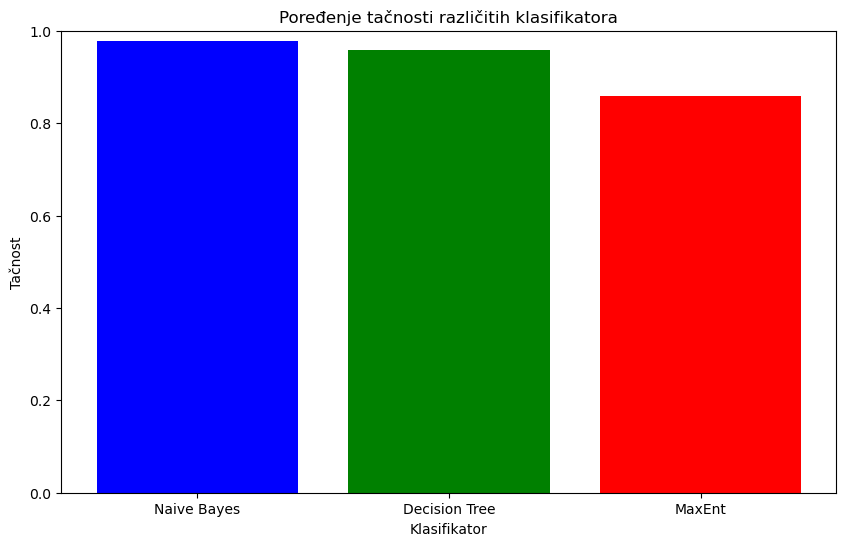

In [50]:
# Prikaz rezultata
classifiers = ['Naive Bayes', 'Decision Tree', 'MaxEnt']
accuracies = [nb_accuracy, dt_accuracy, maxent_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Klasifikator')
plt.ylabel('Tačnost')
plt.title('Poređenje tačnosti različitih klasifikatora')
plt.ylim(0, 1)
plt.show()

#### NaiveBayes je u ovom slučaju najefikasniji, dok DecisionTree takođe daje veoma dobre rezultate. Maxent, iako često koristan, nije pokazao iste performanse kao prva dva modela u ovom konkretnom slučaju.